# Pipeline - Iris

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

import matplotlib.pyplot as plt
import pickle

In [9]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target

df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
117,7.7,3.8,6.7,2.2,2
15,5.7,4.4,1.5,0.4,0
20,5.4,3.4,1.7,0.2,0
104,6.5,3.0,5.8,2.2,2


In [12]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
df["target_name"] = df["target"]
df["target_name"] = df["target_name"].apply(lambda x: data.target_names[x])
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
50,7.0,3.2,4.7,1.4,1,versicolor
93,5.0,2.3,3.3,1.0,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
45,4.8,3.0,1.4,0.3,0,setosa
82,5.8,2.7,3.9,1.2,1,versicolor
88,5.6,3.0,4.1,1.3,1,versicolor
40,5.0,3.5,1.3,0.3,0,setosa
126,6.2,2.8,4.8,1.8,2,virginica
99,5.7,2.8,4.1,1.3,1,versicolor


## Train/Test Split

In [21]:
X = df.drop(columns=["target", "target_name"])
y = df["target_name"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

Train Shape: (120, 4)
Test Shape: (30, 4)


## Pipeline

In [78]:
nn_params = {"hidden_layer_sizes": (30, 20, ),
             "max_iter": 1000,
             "verbose": True,
             "solver": "adam",
             "n_iter_no_change": 100,
             "early_stopping": True}

columns_to_scale = ['sepal length (cm)', 'sepal width (cm)',
                    'petal length (cm)', 'petal width (cm)']

transformer = ColumnTransformer(transformers=[("scaler",
                                               StandardScaler(),
                                               columns_to_scale),
                                                ])

pipe = Pipeline(steps=[("transformer", transformer),
                       ("model", MLPClassifier(**nn_params))])

pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('model',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(30, 20),
                               max_iter=1000, n_iter_no_change=100,
                               verbose=True))])

## Training

In [80]:
pipe.fit(X_train, y_train)

Iteration 1, loss = 1.12232037
Validation score: 0.083333
Iteration 2, loss = 1.11119643
Validation score: 0.083333
Iteration 3, loss = 1.10025579
Validation score: 0.083333
Iteration 4, loss = 1.08950666
Validation score: 0.083333
Iteration 5, loss = 1.07891844
Validation score: 0.083333
Iteration 6, loss = 1.06846778
Validation score: 0.083333
Iteration 7, loss = 1.05818297
Validation score: 0.083333
Iteration 8, loss = 1.04806044
Validation score: 0.083333
Iteration 9, loss = 1.03817405
Validation score: 0.083333
Iteration 10, loss = 1.02842803
Validation score: 0.083333
Iteration 11, loss = 1.01880788
Validation score: 0.083333
Iteration 12, loss = 1.00937486
Validation score: 0.083333
Iteration 13, loss = 1.00008377
Validation score: 0.083333
Iteration 14, loss = 0.99089636
Validation score: 0.083333
Iteration 15, loss = 0.98179930
Validation score: 0.083333
Iteration 16, loss = 0.97277303
Validation score: 0.083333
Iteration 17, loss = 0.96384224
Validation score: 0.083333
Iterat

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('model',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(30, 20),
                               max_iter=1000, n_iter_no_change=100,
                               verbose=True))])

In [82]:
pipe.score(X_test, y_test)

0.9

## Pipeline

In [84]:
pipe.predict(X_test)

array(['versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype='<U10')

In [86]:
y_test

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: target_name, dtype: object

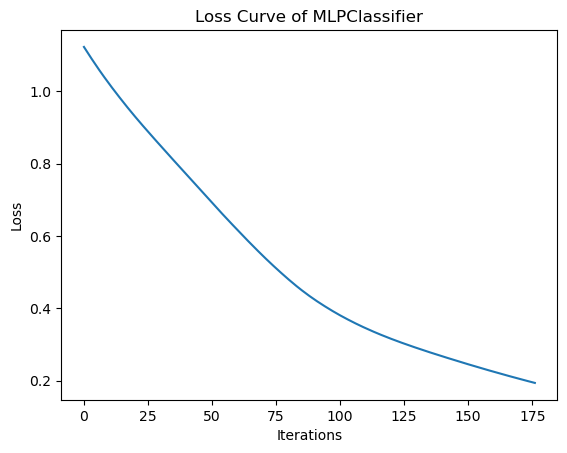

In [88]:
mlp_classifier = pipe.named_steps['model']

# Now access the loss_curve_ attribute
loss_curve = mlp_classifier.loss_curve_

# Plotting the loss curve
plt.plot(loss_curve)
plt.title('Loss Curve of MLPClassifier')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

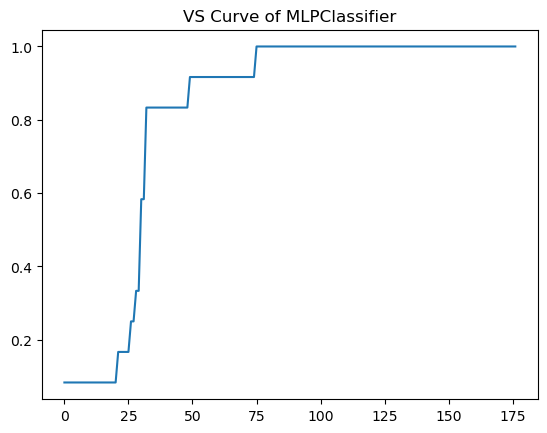

In [90]:
vs_curve = mlp_classifier.validation_scores_

plt.plot(vs_curve)
plt.title('VS Curve of MLPClassifier')
plt.show()

## Evaluation

In [92]:
predictions = pipe.predict(X_test)

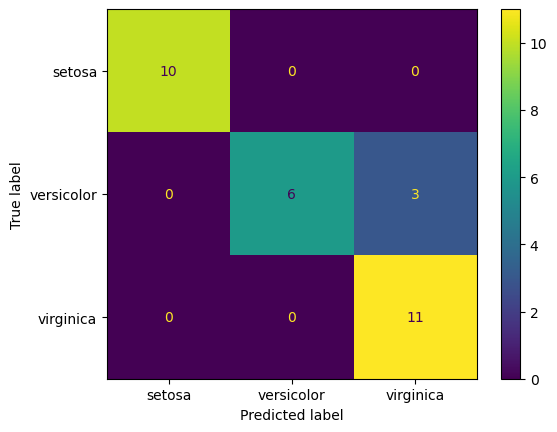

In [94]:
cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
plt.show()

## Export to Pickle

In [106]:
pickle.dump(pipe, open("objects/iris-pipe.pkl", "wb"))